In [139]:
#Installare pachetti 

#!install ....

#Fai una prova su altro pc per vedere se funziona 

In [184]:
#Starter Pack
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import chi2_contingency
import requests

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# from statsmodels.tsa.seasonal import seasonal_decompose #per serie temporali
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance

from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os  # per interagire con il sistema operativo, eseguire operazioni sul file system e gestire variabili d'ambiente.
import warnings 
warnings.filterwarnings('ignore')

import missingno as msno
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Introduzione

Analizzeremo dei dati inerenti alla soddisfazione dei clienti di una compagnia aerea. Quest'ultima verrà chiamata "Compagnia x" d'ora in avanti.

La Compagnia X ci ha consegnato due file csv. Uno di "Train" e uno di "Test". Come primo passo, andremo ad Aprofondire questi due file csv. La denominazione può farci intendere che la compagnia si è affidato per un tempo a un data scientist.

Analizziamo innanzitutto entrambi i file.  

Per far si che questo notebook venga usufruito in qualsiasi PC, trovate nel primo blocco le librerie da installare. Faremo l'accesso ai due file csv mediante una request su una data repository in github. Per consultare il percorso cliccare su ->  https://github.com/Giofabro/exercise-data-analysis/tree/main/Data_Repository

In [141]:
# URL del file test.csv raw su GitHub
url_test_df = 'https://raw.githubusercontent.com/Giofabro/exercise-data-analysis/main/Data_Repository/ProjectDataScience_NeuralAcademy/test.csv'

# Lettura del file CSV direttamente dall'URL
test_df = pd.read_csv(url_test_df)

#URL del file train.csv raw su GitHub 
url_train_df = 'https://raw.githubusercontent.com/Giofabro/exercise-data-analysis/main/Data_Repository/ProjectDataScience_NeuralAcademy/train.csv'

# Lettura del file CSV direttamente dall'URL
train_df = pd.read_csv(url_train_df)

In [142]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [143]:
test_df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [145]:
train_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## Descrizione Variabili

1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Poiche le colonne combaciano e sembra essere frutto di uno split, capiamo come prima cosa se questi due file sono stati configurati effettivamente come un Train e un Test, medianti le percentuali di distribuzione.

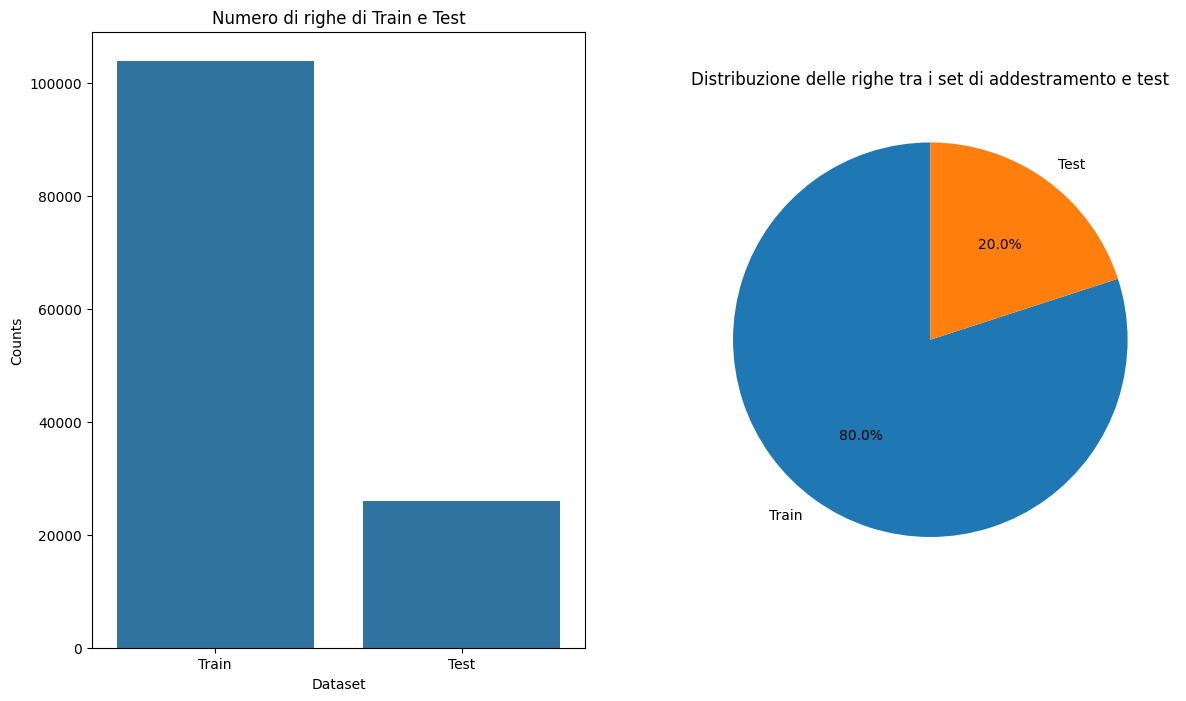

In [146]:
# Creiamo un DataFrame per i conteggi
counts_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Counts': [len(train_df), len(test_df)]
})

#Creaimo due grafici, uno a barre e uno a torta (per le percentuali)
plt.figure(figsize=(14, 8))

# Primo subplot -> grafico a barre
plt.subplot(1, 2, 1)
sns.barplot(x='Dataset', y='Counts', data=counts_df)
plt.title('Numero di righe di Train e Test')

# secondo plot -> grafico a torta 
labels = counts_df['Dataset']
sizes = counts_df['Counts']
plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione delle righe tra i set di addestramento e test')

plt.show()



Sì, sembra proprio un classico split 80/20. Tuttavia procediamo nel concatenare entrambi i dataframe, per avere una versione integra e completa del DataFrame ed adottare in autonomia scelte inerenti allo split di Train e di Test. E' inoltre essenziale concatenarli per procedere alla fase dell'EDA.

In [147]:
df = pd.concat([train_df, test_df])

In [148]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [149]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Registriamo 393 valori mancanti nella colonna "Arrival Delay in minutes". Droppare queste righe non inciderà sull'integrità del nostro df (perderemo solo il 0,30% delle informazioni)

In [150]:
#Pulizia DataFrame 

df = df.drop_duplicates()
df = df.dropna()

In [151]:
#check
check_row = len(df)
check_row

129487

# EDA

Iniziamo con qualche plot per individuare degli insight

<Axes: xlabel='satisfaction', ylabel='count'>

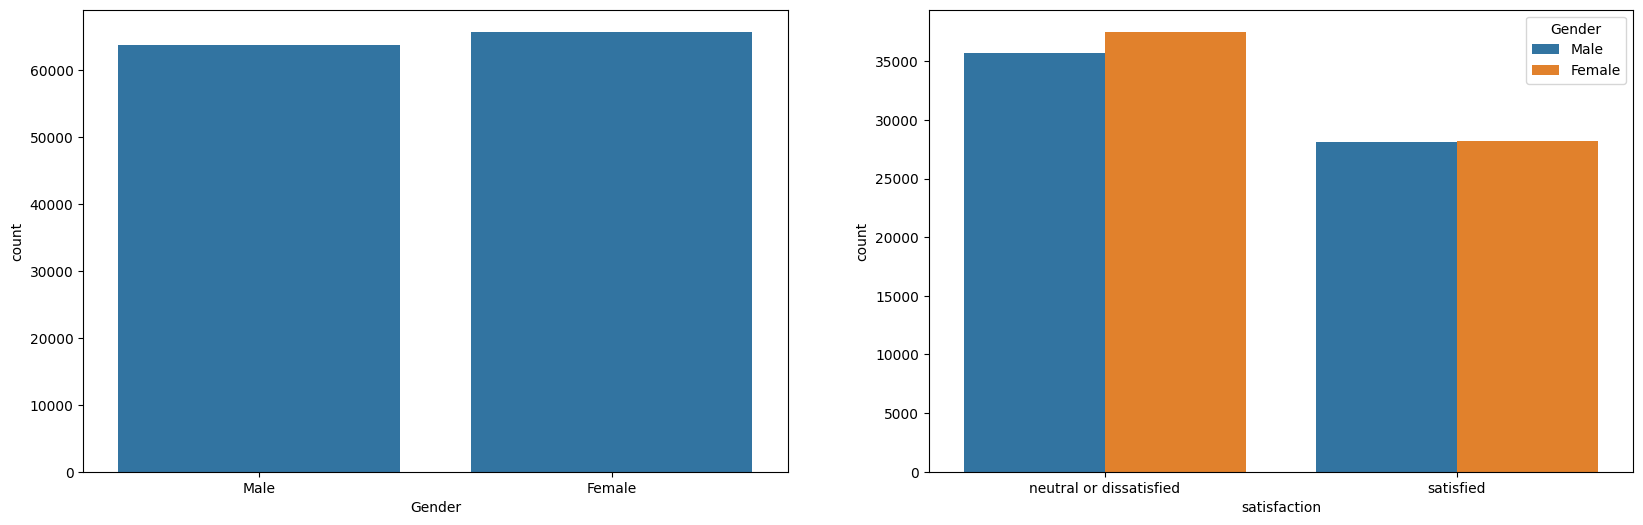

In [152]:
# Dimensioni plot
plt.figure(figsize=(20, 6))

# Primo subplot
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)

# Secondo subplot
plt.subplot(1, 2, 2)
sns.countplot(x='satisfaction', data=df, hue='Gender')

Insight ....

<Axes: xlabel='Flight Distance', ylabel='Count'>

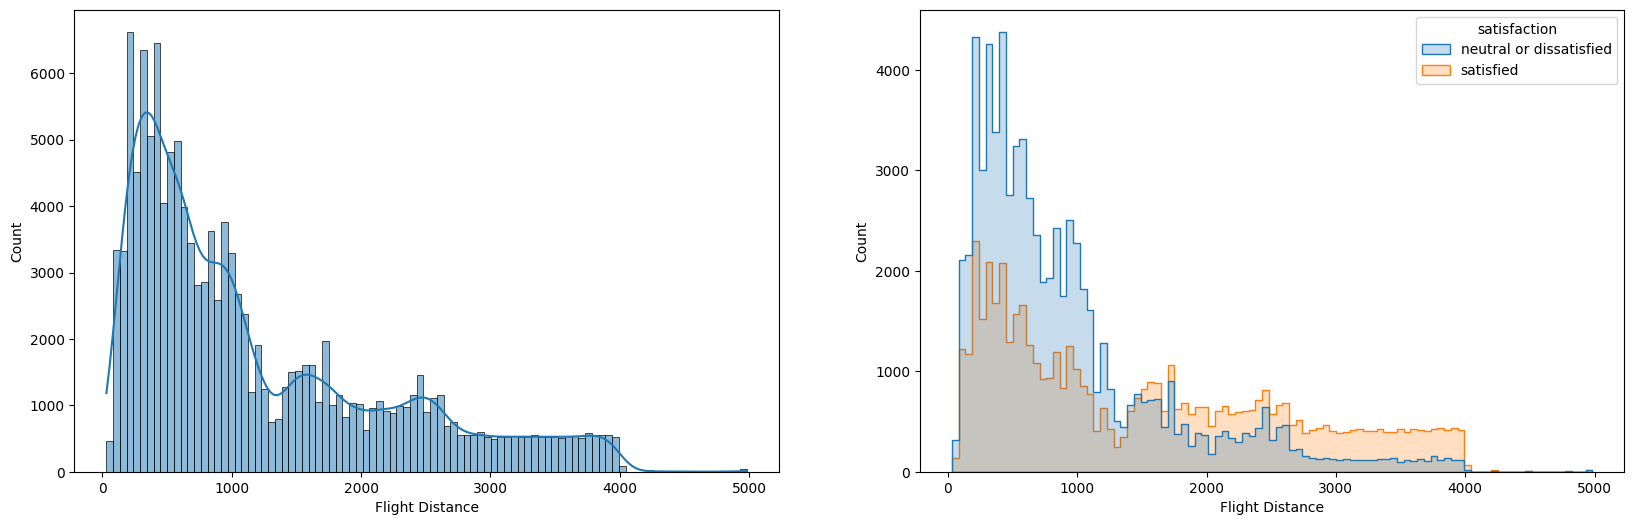

In [153]:
# Dimensioni plot
plt.figure(figsize=(20, 6))

# Primo subplot
plt.subplot(1, 2, 1)
sns.histplot(x='Flight Distance', kde=True,  data=df)

# Secondo subplot
plt.subplot(1, 2, 2)
sns.histplot(x='Flight Distance', data=df, hue='satisfaction', element='step')

Insight .... 

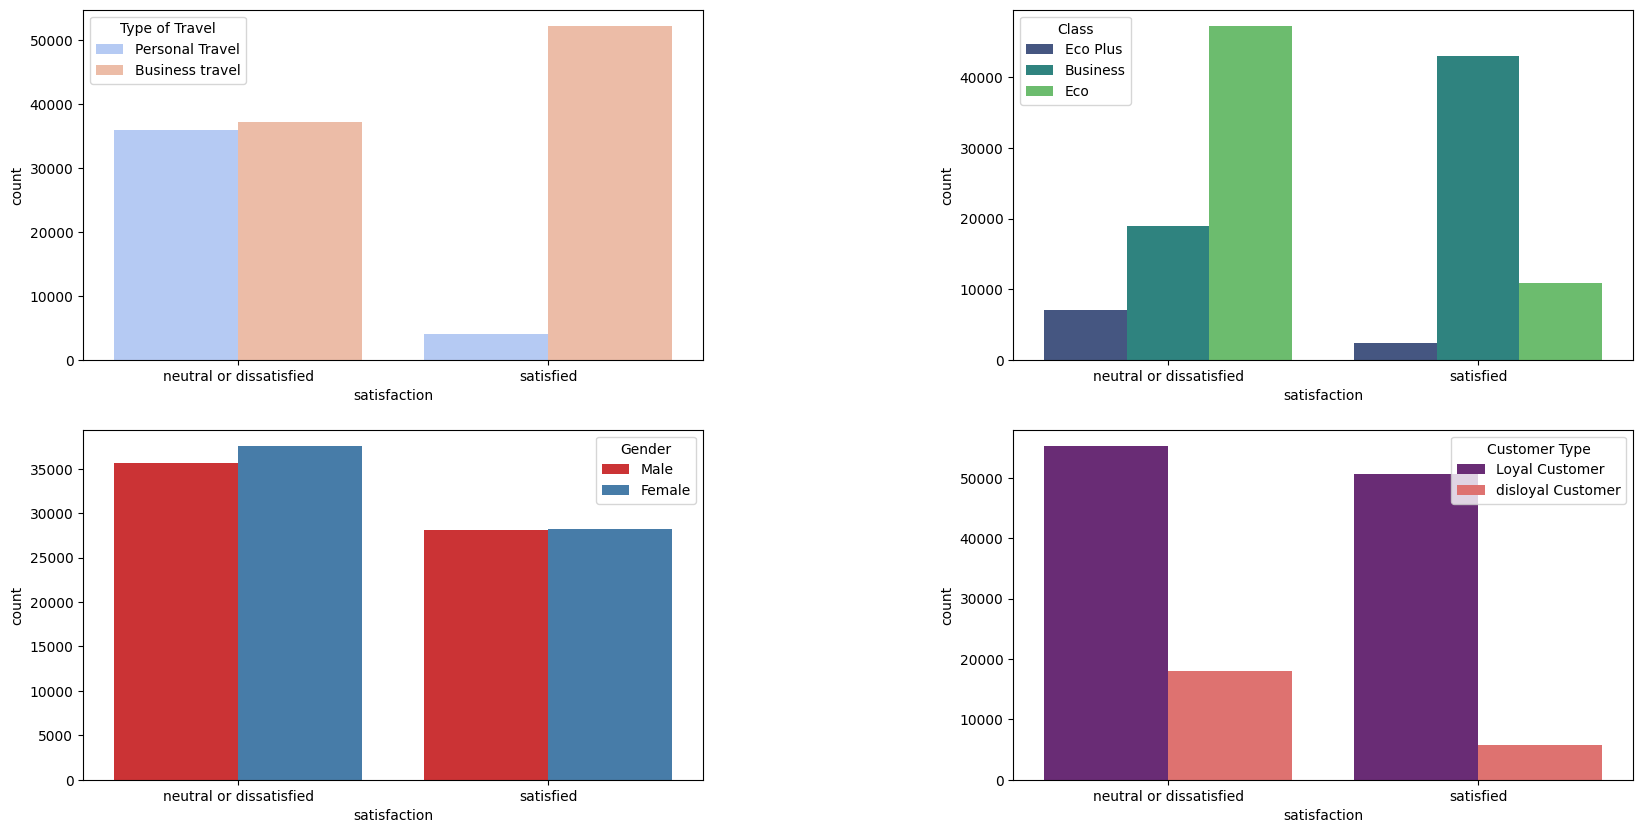

In [154]:
# Dimensioni plot
plt.figure(figsize=(20, 10))

plt.subplots_adjust(wspace=0.5)

# Primo subplot
plt.subplot(2, 2, 1)
sns.countplot(x='satisfaction', data=df, hue='Type of Travel', palette='coolwarm')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Type of Travel', borderaxespad=0.)

# Secondo subplot
plt.subplot(2, 2, 2)
sns.countplot(x='satisfaction', data=df, hue='Class', palette='viridis')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Class', borderaxespad=0.)

# Terzo subplot
plt.subplot(2, 2, 3)
sns.countplot(x='satisfaction', data=df, hue='Gender', palette='Set1')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Gender', borderaxespad=0.)

# Quarto subplot
plt.subplot(2, 2, 4)
sns.countplot(x='satisfaction', data=df, hue='Customer Type', palette='magma')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Customer Type', borderaxespad=0.)

plt.show()

Subplot 1: I viaggiatori di affari e personali si sono dichiarati similmente neutrali o insoddisfatti. Tuttavia, si può notare che tra i viaggiatori soddisfatti, i viaggi d'affari superano di gran lunga quelli personali. 

Subplot 2: C'è una distinta preferenza per la classe Business tra i passeggeri soddisfatti, seguita dalla classe Eco Plus. La classe ECo è quella che riscuote minor successo

Subplot 3: I dati mostrano una distribuzione quasi equa tra maschi e femmine sia nella categoria dei neutrali/insoddisfatti sia in quella dei soddisfatti.

Subplot 4: la maggior parte dei clienti soddisfatti sono clienti fedeli. Altresì anche quelli meno soddisfatti

<Axes: xlabel='Age', ylabel='Count'>

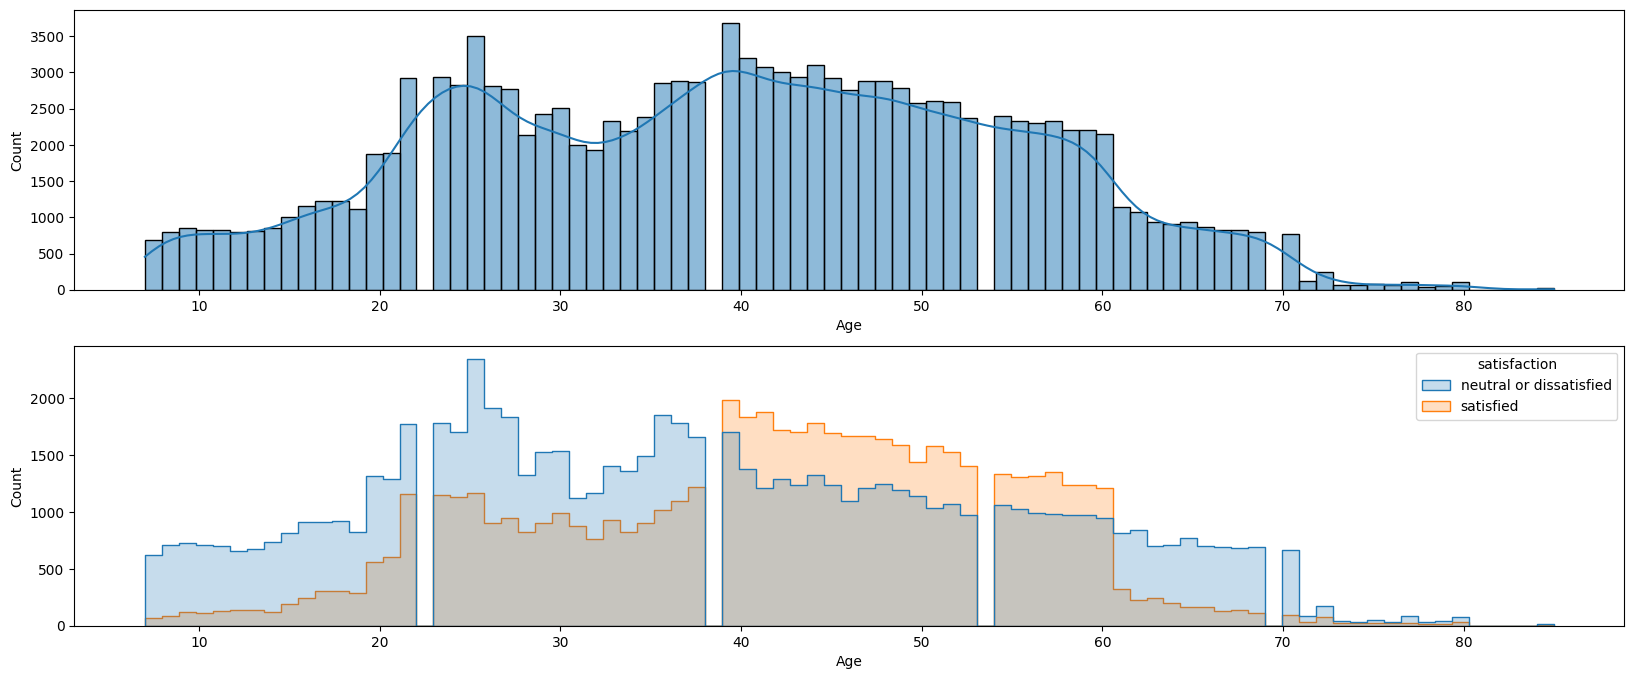

In [155]:
# Dimensioni plot
plt.figure(figsize=(20, 8))

#First plot
plt.subplot(2,1,1)
sns.histplot(x='Age', kde=True,  data=df)

#Second subplot
plt.subplot(2,1,2)
sns.histplot(x='Age', data=df, hue='satisfaction', element='step')

Possiamo osservare che la maggior parte dei passeggeri ha un'età compresa tra i 20 e i 60 anni, con un picco intorno ai 40 anni. Il secondo grafico è un istogramma sovrapposto che mostra la distribuzione dell'età divisa per i livelli di soddisfazione (soddisfatti vs neutrali o insoddisfatti). Qui possiamo notare che i passeggeri soddisfatti tendono ad essere distribuiti su tutto l'arco delle età, con una leggera predominanza nella fascia di età centrale (da 30 a 50 anni). I passeggeri neutrali o insoddisfatti sembrano essere più giovani, con un picco significativo nella fascia di età 20-30 anni.

### Crosstab & chi-quadrato [Age]

Useremo una tabella di contigenza per approfondire la relazione tra Age e Satisfaaction. Poi procederemo con il test del chi-quadrato

Con la tabella di contigenza avremo per righe l'eta dei passegeri e due colonne: "neutral or dissatisfied" e "satisfied" 

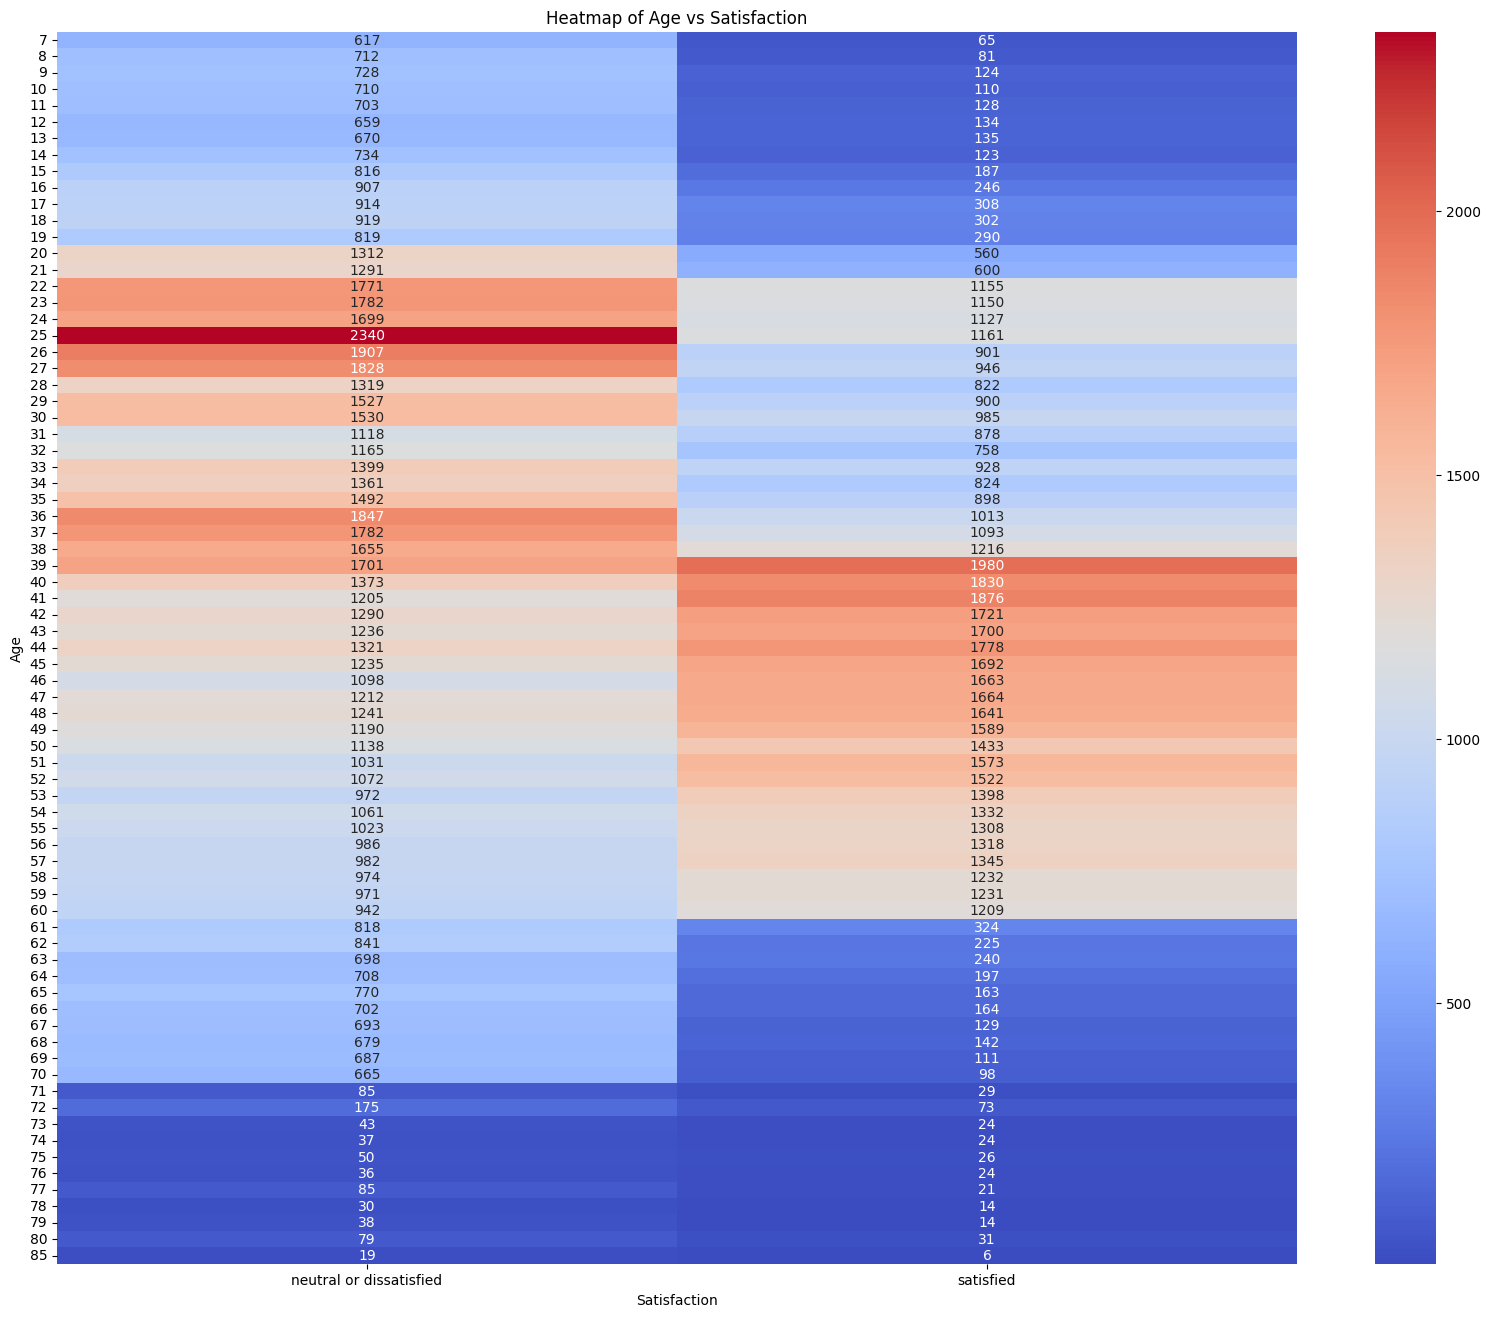

In [156]:
# Creare una Crosstab
contingency_table = pd.crosstab(df['Age'], df['satisfaction'])

# Dimensioni plot
plt.figure(figsize=(20, 16))

# Plot contingenza
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='g') 
plt.title('Heatmap of Age vs Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()


I 25enni sono i meno soddisfatti. i 39enni i più soddisfatti.

Una volta creata la tabella di contigenza possiamo procedere al test del chi-quadrato. Il test ci indicherà chiaramente se c'è una relazione significativa tra age e satisfaction. Se il valore calcolato di chi-quadrato è maggiore del valore critico (P)

, si rifiuta l'ipotesi nulla (che afferma che non c'è relazione tra le variabili) e si conclude che c'è una relazione significativa tra le variabili.

In [157]:
# Test del chi-quadrato
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 11224.340874927795, p-value: 0.0


Poichè il valore P è 0, possiamo asserire che esista una relazione significativa tra l'età dei passeggeri e il loro livello di soddisfazione. 

Ciò significa che l'età è potenzialmente un fattore importante che contribuisce al grado di soddisfazione di un passeggero. Questa informazione potrebbe essere utile per la compagnia aerea per sviluppare strategie mirate a migliorare l'esperienza di volo per diverse fasce di età e aumentare il livello di soddisfazione complessivo dei passeggeri.

L'età potrebbe essere un buon predittore della soddisfazione in questo contesto specifico, e quindi potrebbe essere utile come caratteristica (feature) in un modello di machine learning per prevedere la soddisfazione. Tuttavia, procederemo con ulteriori analisi prima di darlo per certo. 

# Pre-processing

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64


<Axes: xlabel='satisfaction'>

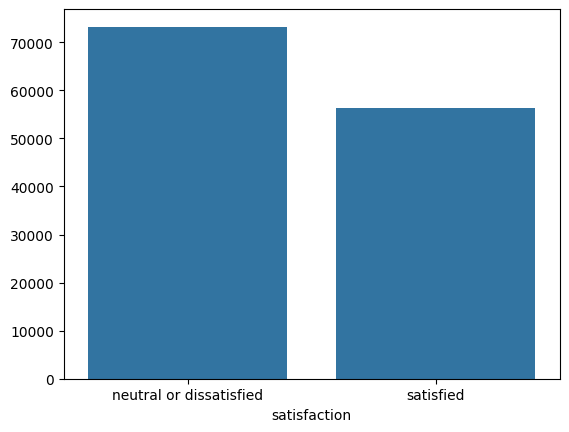

In [158]:
#Distrubizione target
class_counts = df['satisfaction'].value_counts()
print(class_counts)

sns.barplot(x=class_counts.index, y=class_counts.values)

## Label Encoding

In [159]:
#Label encoding 
satisfaction_mapping = {"satisfied": 1, "neutral or dissatisfied": 0}
df['satisfaction'] = df['satisfaction'].map(satisfaction_mapping) 

## Gender column - label encoding  
gender_mapping = {"Female": 1, "Male": 0}
df['Gender'] = df['Gender'].map(gender_mapping) 

## Customer type column - label encoding  
customer_type_mapping = {"Loyal Customer": 1, "disloyal Customer": 0}
df['Customer Type'] = df['Customer Type'].map(customer_type_mapping) 

## Type of travel column - label encoding  
travel_type_mapping = {"Business travel": 1, "Personal Travel": 0}
df['Type of Travel'] = df['Type of Travel'].map(travel_type_mapping)  

## Class column - label encoding  
class_mapping = {"Business": 3, "Eco Plus": 2, "Eco": 1}
df['Class'] = df['Class'].map(class_mapping)  

In [160]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,0,34,1,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
25972,0,1,23,1,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
25973,1,1,17,0,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
25974,0,1,14,1,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


## Features selection -> correlazioni  

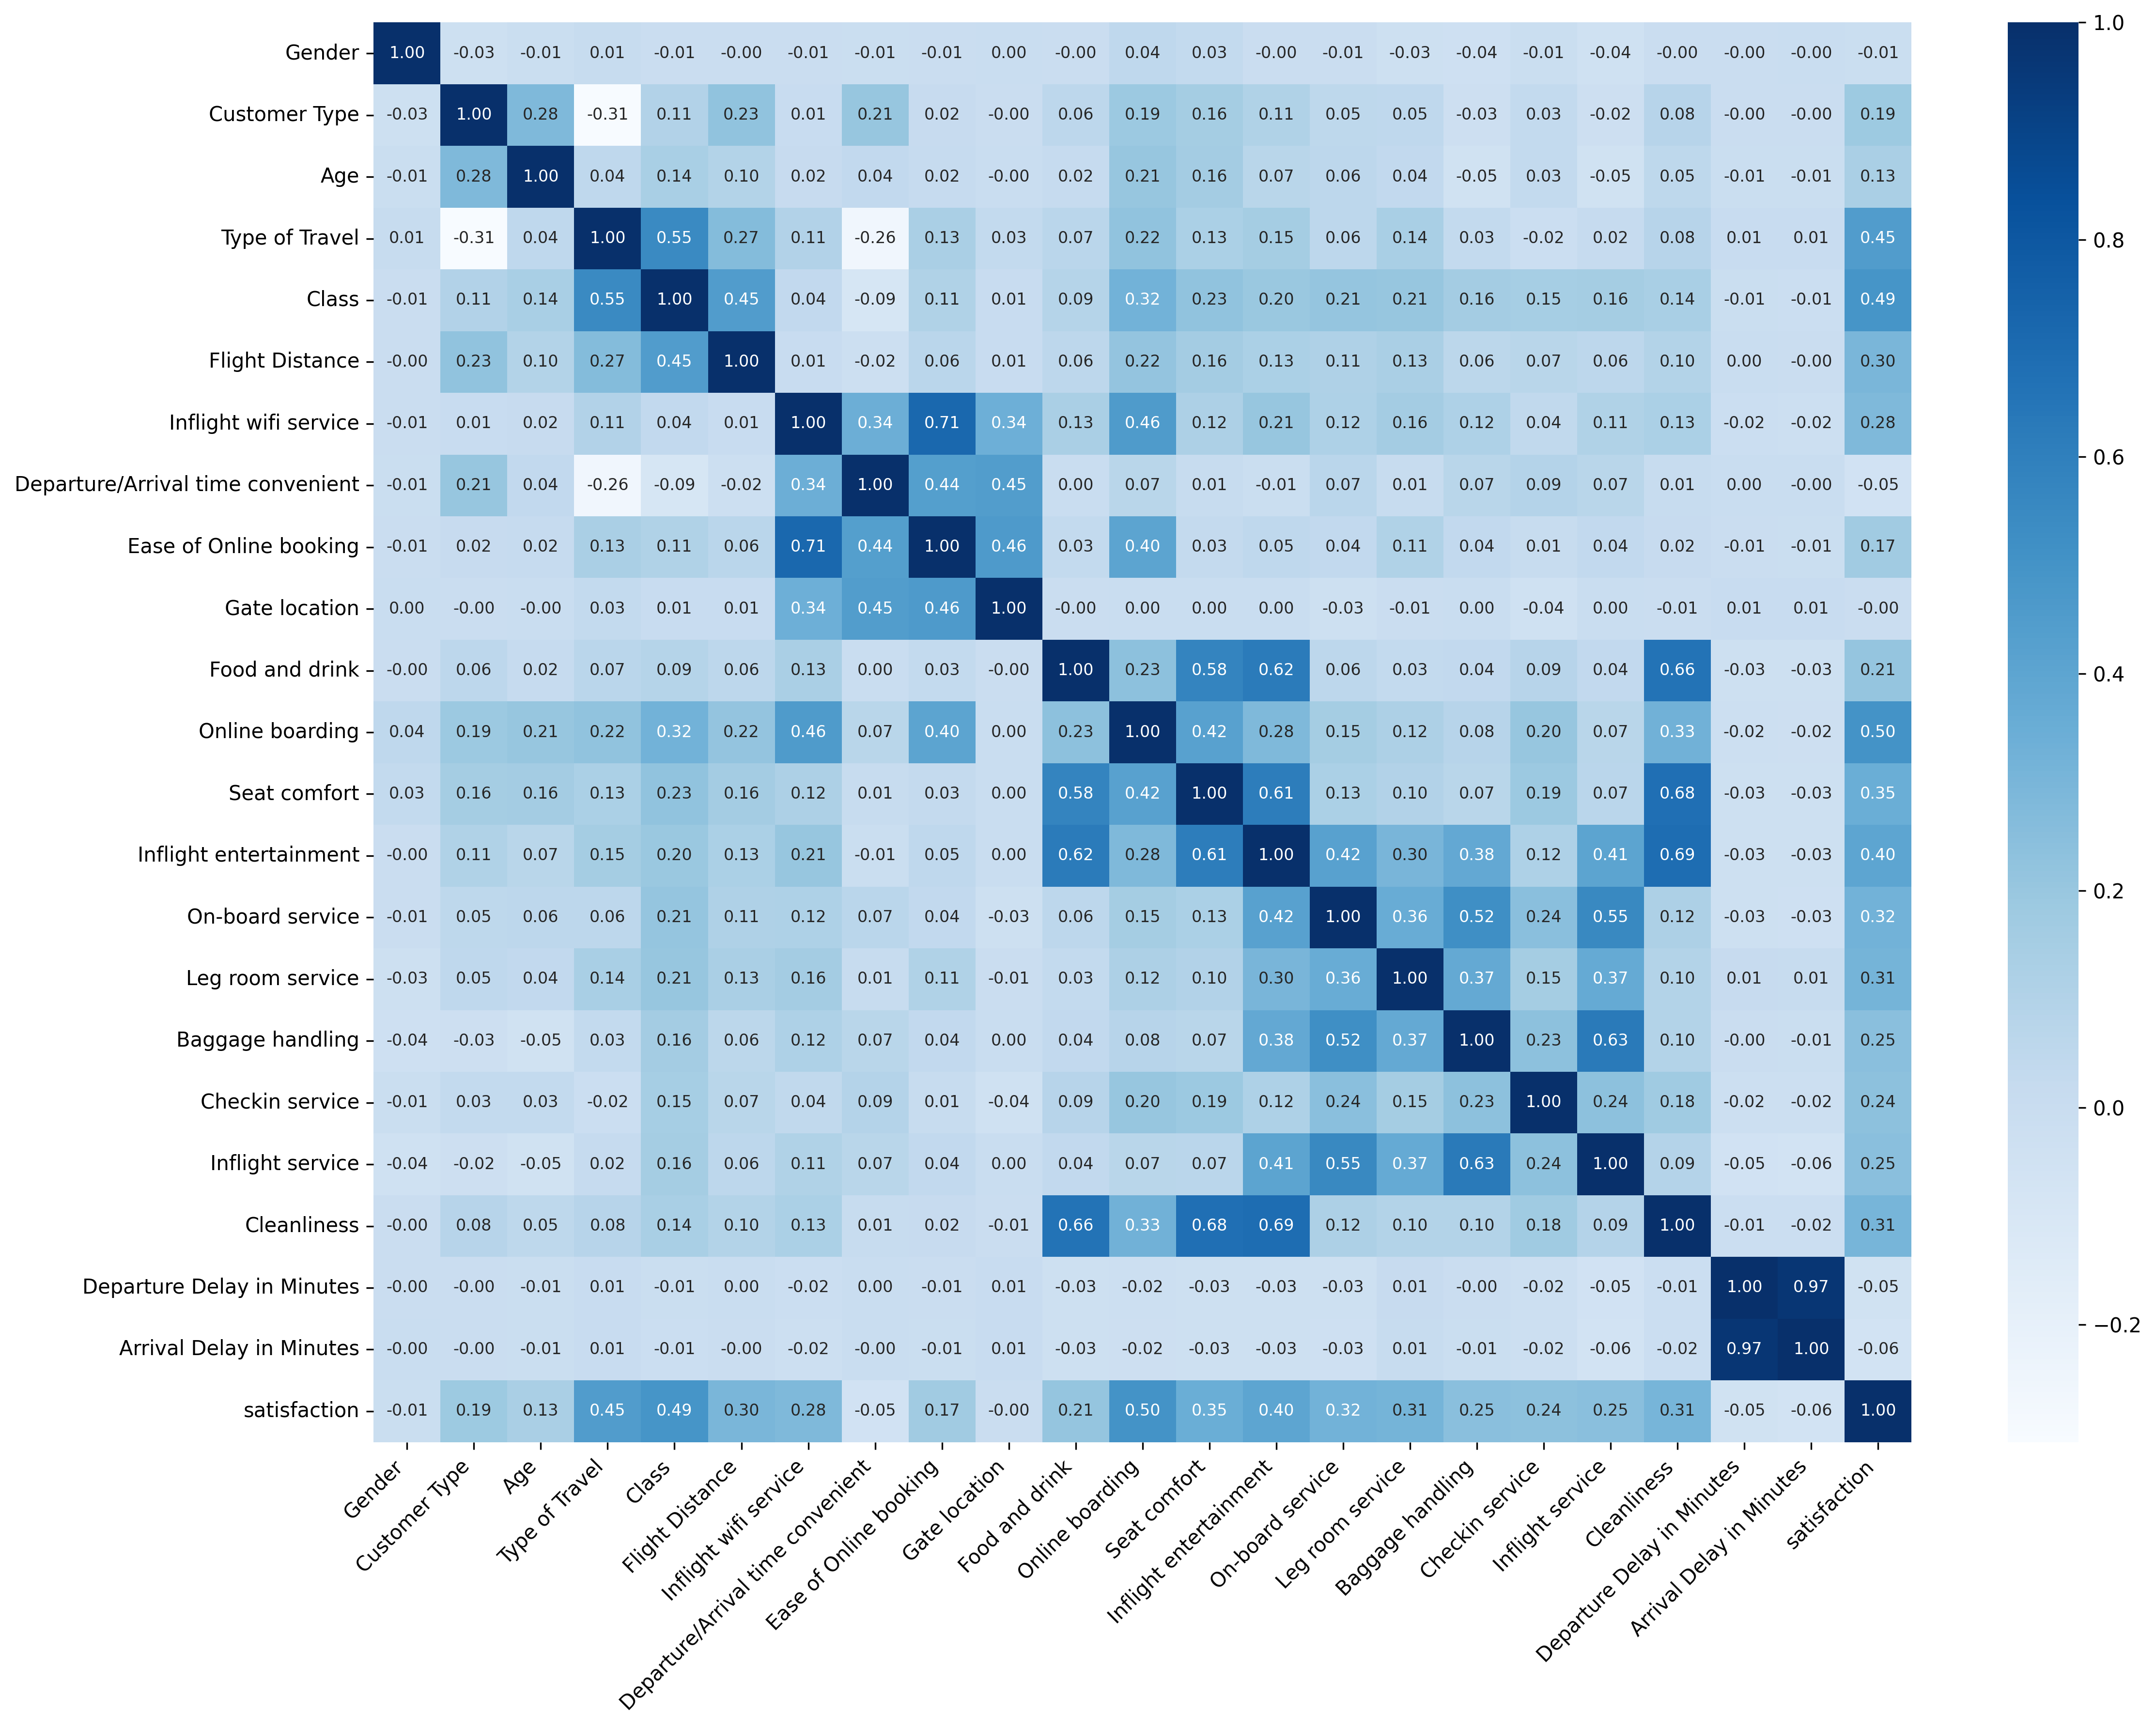

In [161]:
plt.figure(figsize=(16,12), dpi=300)  # Aumenta la dimensione e la risoluzione
heatmap = sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', size=10)  # Ruota le etichette dell'asse x per leggibilità
plt.yticks(size=10)  # Aumenta la dimensione del font per le etichette dell'asse y
plt.tight_layout()  # Ajusta la disposizione
plt.show()

In [162]:
plt.figure(figsize=(20,20), dpi=300) 

#cmap = sns.diverging_palette(240, 10, as_cmap=True)
#sns.heatmap(df.corr(), mask=np.triu(np.ones_like(corr)), cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
#plt.xticks(rotation=45, ha='right', size=10)  # Ruota le etichette dell'asse x per leggibilità
#plt.yticks(size=10)  # Aumenta la dimensione del font per le etichette dell'asse y
#plt.tight_layout()  # Ajusta la disposizione
#plt.show()

<Figure size 6000x6000 with 0 Axes>

<Figure size 6000x6000 with 0 Axes>

Perche non ho usato queste features e non ho applicato lo caling:

Age --> 

Flight 

Perche ho scelto queste features ... 

1. Inflight entertainment: Forte correlazione positiva con la soddisfazione.
2. Seat comfort (o Cleanliness): Scegliere una a causa della loro alta correlazione per evitare la multicollinearità.
3. Online boarding: Moderata correlazione positiva.
4. Leg room service: Moderata correlazione positiva.
5. On-board service: Moderata correlazione positiva.
6. Baggage handling: Moderata correlazione positiva.
7. Checkin service: Moderata correlazione positiva.
8. Class (o Type of Travel): entrambe hanno una moderata correlaazione con il target. Class dà un po' più di informazioni. Capiamo però la loro distribuzione (meglio quello con le classi meglio distribuite)Moderata correlazione positiva.

In [163]:
#distribution_Class_or_typeoftravel = sns.pairplot(df[["Class", "Type of Travel"]])
#distribution_Class_or_typeoftravel

In [164]:
#Prima Screamtura DataFrame
# df = df[["Leg room service", "Inflight entertainment", "Online boarding", "Class", "Type of Travel", "On-board service", "Inflight service", "satisfaction"]]

#Seconda scrematura Dataframe
#df = df[["Leg room service", "Inflight entertainment", "Online boarding", "Checkin service", "Type of Travel", "On-board service", "Inflight service", "satisfaction"]]

In [165]:
y = df["satisfaction"]
X = df[["Leg room service", "Inflight entertainment", "Online boarding", "Checkin service", "Type of Travel", "On-board service", "Inflight service"]]

In [166]:
#sns.pairplot(df)

In [167]:
# Prova con la convarianza!



# Processing

Procediamo con StratifiedShuffleSplit 

In [168]:
train_test = StratifiedShuffleSplit(test_size = 0.2, n_splits = 1, random_state = 42)

for train_index, test_index in train_test.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [169]:
#Valutiamo la distribuzione tra Train e Test

#Per valutare distribuzione
np.bincount(y_train)/len(y_train), np.bincount(y_test)/len(y_test)

(array([0.56550406, 0.43449594]), array([0.56548768, 0.43451232]))

## Scelta del modello 

Useremo un ensemble method, di tipo omogeneo. Le scelte ricadono tra Random Forest (bagging) e XGBoost (boosting)

Utilizzano entrambi come modello base il decision tree.
Il random forest può essere l'ideale per l'overfitting, in quanto crea decision tree indipendenti e li combina.
XGBoost potrebbe fare al caso nostro poiché massimizza la performance predittiva.

Li abbiamo provati entrambi. XGBoost ci ha dato le migliori performance. 

Nel pre-processing abbiamo fatto lo split tra Train e Test. Tuttavia, mediante la funzione plot importance di XGBoost, sapremo quali features incidono maggiormente sul nostro modello. Quindi prendiamo in esame tutte le features presenti sui nostri dati e applichiamo uno standard scaler. La nostra Y non sarà oggetto dello scaling, vogliamo che resti tra 1 e 0.  

In [170]:
# Richiamo il df integro 
df

# X e y
X= df.drop('satisfaction',axis=1)
y= df['satisfaction']

# Train e Test
train_test = StratifiedShuffleSplit(test_size = 0.2, n_splits = 1, random_state = 42)

for train_index, test_index in train_test.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#Scaling (solo per X) lasciamo y integra. 
scaler = StandardScaler()
scld_X_train = scaler.fit_transform(X_train)
scld_X_test = scaler.transform(X_test)

Passiamo alla GridSearch. Vengono indicati per comodità i migliori parametri stabiliti dalla grid search. Per

La gridsearch è stata impostata del seguente modo:

Modello base: xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
* eval_metric in XGBoost
* label encoder non necessario (già fatto)

Griglia di parametri
* max_depth': [3, 4, 5] -> 
* 'min_child_weight': [1, 5, 10] ->
* 'gamma': [0.5, 1, 1.5, 2] ->
* 'learning_rate': [0.01, 0.1, 0.2] ->
* 'n_estimators': [100, 200, 300] ->

Miglior parametri: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300}

Best score: 0.9627276985477909


eval_metric in XGBoost è utilizzato per guidare l'addestramento del modello, mentre scoring in GridSearchCV è utilizzato per selezionare il miglior modello dalla griglia.

In [172]:
# Creazione di un modello XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, random_state=42)

In [173]:
# Addestramento del modello
model.fit(scld_X_train, y_train)

# Predizione sui dati di test
predictions = model.predict(scld_X_test)

Effettuiamo adesso una Cross-Validation, utile per valutare la generalizzazione delle prestazioni del modello. Poiche stiamo trattando un problema di classificazione binaria la funzione `cross_val_score`ci restituirà un array di punteggi cje equivalgono all’accuratezza.

In [ ]:
# Cross val score with cv = 25
scores = cross_val_score(model, scld_X_train, y_train, cv=25)

scores

array([0.96259653, 0.96718147, 0.9640444 , 0.96163127, 0.9601834 ,
       0.96621622, 0.96573359, 0.9659749 , 0.96428571, 0.96042471,
       0.96500965, 0.96742278, 0.96138996, 0.96332046, 0.96138064,
       0.95969105, 0.9608979 , 0.96331161, 0.95534637, 0.96138064,
       0.96644943, 0.95993242, 0.96427709, 0.96331161, 0.96693217])

In [ ]:
# Media di scores
print(scores.mean())
print(scores.std())

0.9631330396808311
0.002878439644180049


Tutti i punteggi sono elevati e simili tra loro, ciò indica che il modello è stabile e si generalizza bene sui diversi subset dei dati. Non ci sono punteggi variabili, il che ci indica che non ci sono specifici subset di dati a cui il nostro modello è sensibile.

* La media conferma l'ottimo punteggio del modello.
* La deviazione standard ci fornisce una misura della variabilità o della consistenza della performance del modello attraverso i diversi fold della cross-validation. In questo caso la deviazione standard bassa ci indica che il modello è stabile e si comporta in modo simile su diversi sottoinsiemi dei dati.

Utilizziamo classification_report per avere a disposizione altre metriche oltre all'accuratezza. 

In [174]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



* Precision -> misura la percentuale di casi positivi identificati correttamente dal modello
* Recall (o True positive Rate) -> quanto è bravo il modello a rilevare i casi positivi tra tutti i casi effettivamente positivi presenti.
* f1-score -> combina Precision e Recall in un unico valore numerico.

Importiamo per completezza anche Specifity

* Specifity (o True Negative Rate) -> misura la capacità del modello di identificare correttamente tutti gli esempi negativi in un dataset.

In [175]:
# Sklearn non mette a disposizione nessuna funzione per Specifity. Facciamolo noi
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

print("Specifity score: ", specificity_score(y_test, predictions))

#Balanced accuracy
#print("balanced accuracy: ", balanced_accuracy_score(y_test, predictions))

Specifity score:  0.9782178217821782


True Positive: 0.4084485288439262
False Positive: 0.01231755347903313
True Negative: 0.5531701289674879
False Negative: 0.026063788709552862


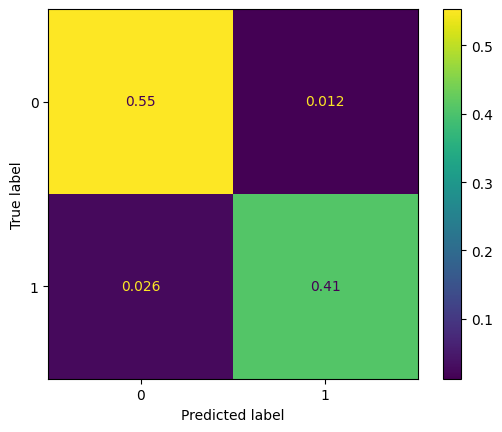

In [176]:
# Calcola la matrice di confusione
cm = confusion_matrix(y_test, predictions, normalize='all')

# Usa ravel per estrarre TP, FP, TN, FN
tn, fp, fn, tp = cm.ravel()

print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")
print(f"False Negative: {fn}")

# Visualizza la matrice di confusione
ConfusionMatrixDisplay(cm).plot()

Curva ROC (Receiver Operating Characteristic), che è uno strumento utilizzato per valutare la performance di un modello di classificazione binaria. La curva ROC è un grafico che mostra il trade-off tra il tasso di veri positivi (True Positive Rate, TPR) e il tasso di falsi positivi (False Positive Rate, FPR) a vari threshold di classificazione.

* Asse delle ascisse (FPR): Indica la probabilità che il modello classifichi erroneamente un esempio negativo come positivo. Un valore basso di FPR è preferibile perché significa che ci sono pochi falsi allarmi.

* Asse delle ordinate (TPR): Rappresenta la probabilità che il modello classifichi correttamente un esempio positivo. Un valore elevato di TPR è desiderabile perché significa che il modello è in grado di riconoscere correttamente la classe positiva.

* Linea diagonale tratteggiata: Rappresenta un classificatore casuale. Un buon modello avrà una curva ROC che si trova sopra la diagonale verso l'angolo superiore sinistro, indicando che ha una performance migliore rispetto al caso casuale.

Area sotto la curva (AUC): È un singolo valore che riassume la performance del modello. Varia da 0 a 1, dove 1 indica una performance perfetta e 0.5 indica un modello non migliore di un lancio di moneta casuale. Nel tuo grafico, l'AUC è 0.96, il che è molto vicino a 1, indicando che il modello ha una performance eccellente.

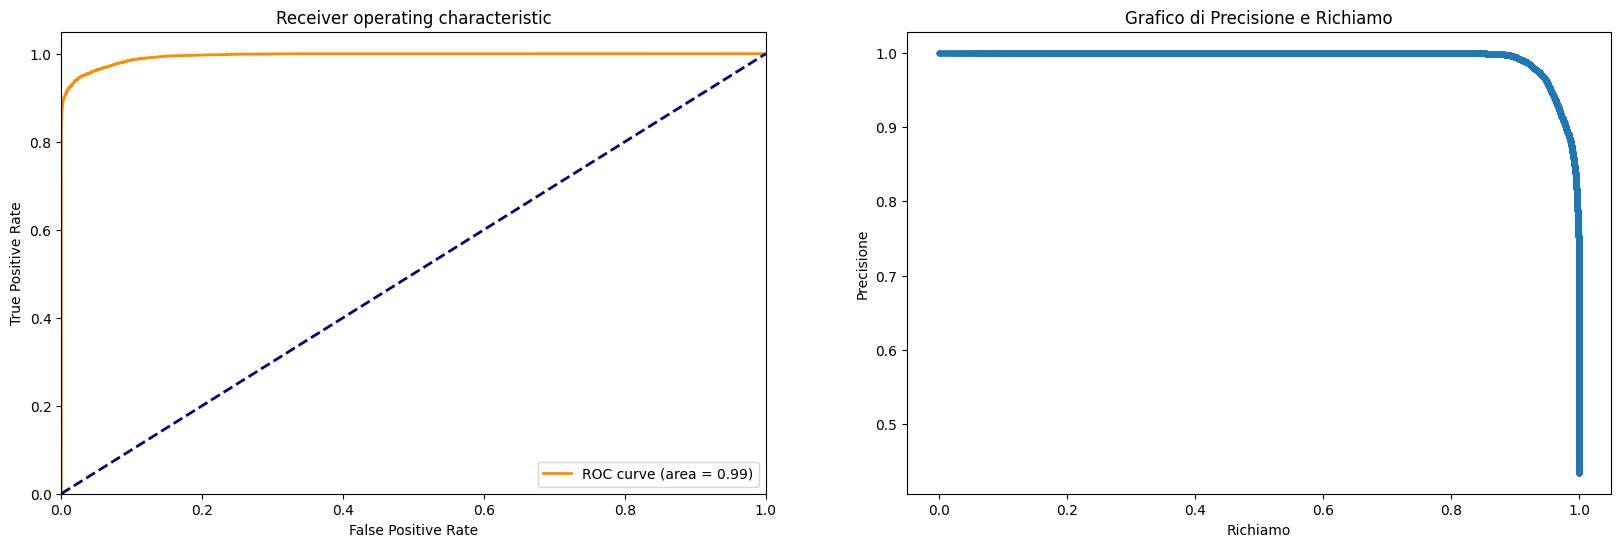

In [181]:
# Dimensioni Plot
plt.figure(figsize=(20, 6))

# Curva ROC e AUC - plot 1
plt.subplot(1, 2, 1)  
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(scld_X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Calcolare precisione e richiamo - plot 2
plt.subplot(1, 2, 2)  
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(scld_X_test)[:, 1])
plt.plot(recall, precision, marker='.')
plt.title('Grafico di Precisione e Richiamo')
plt.xlabel('Richiamo')
plt.ylabel('Precisione')

# Visualizzare i grafici
plt.show()

Dato che scld_X_train è un array senza nomi di colonne, quando cerchiamo di avere un grafico sull'importanza delle features, il modello di defaiul assegna f0, f1, f2, ecc. 

Correggiamo questo punto soltanto per avere un grafico più chiaro in fase di valutazione. 

<Figure size 2000x2000 with 0 Axes>

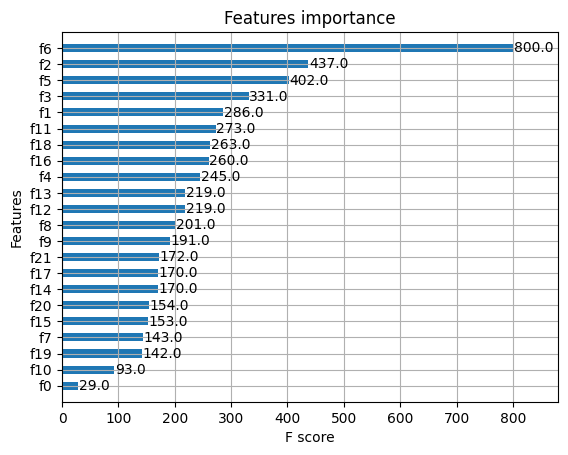

In [207]:
# Dimensioni Plot
plt.figure(figsize=(20, 20))

# Importanza delle Features
xgb.plot_importance(model, importance_type='weight', max_num_features=22, show_values=True, height=0.5)
plt.title('Features importance')
plt.show()

* f0 corrisponde a "Gender"
* f1 corrisponde a "Customer Type"
* f2 corrisponde a "Age"
* f3 corrisponde a "Type of Travel"
* f4 corrisponde a "Class"
* f5 corrisponde a "Flight Distance"
* f6 corrisponde a "Inflight wifi service"
* f7 corrisponde a "Departure/Arrival time convenient"
* f8 corrisponde a "Ease of Online booking"
* f9 corrisponde a "Gate location"
* f10 corrisponde a "Food and drink"
* f11 corrisponde a "Online boarding"
* f12 corrisponde a "Seat comfort"
* f13 corrisponde a "Inflight entertainment"
* f14 corrisponde a "On-board service"
* f15 corrisponde a "Leg room service"
* f16 corrisponde a "Baggage handling"
* f17 corrisponde a "Checkin service"
* f18 corrisponde a "Inflight service"
* f19 corrisponde a "Cleanliness"
* f20 corrisponde a "Departure Delay in Minutes"
* f21 corrisponde a "Arrival Delay in Minutes"

In [ ]:
#Fai una visualizzazione con la PCA!

In [ ]:
# Crea un DataFrame basato su X_test
#X_test_with_predictions = X_test.copy()

# Aggiungi la colonna del target originale (y_test)
#X_test_with_predictions['actual_satisfaction'] = y_test.values

# Aggiungi la colonna delle previsioni del modello
#X_test_with_predictions['predicted_satisfaction'] = predictions

# Mostra il nuovo DataFrame
#X_test_with_predictions

## Random Forests

In [ ]:
# Fai una grid search di xgb! 

# Iper parametri base
randomForests_classifier = RandomForestClassifier(random_state=42)

# Definire la griglia di parametri
param_grid = {
    'n_estimators': [100, 200, 500, None],
    #'max_depth': [10, 50, 100, None],
    #'min_samples_split': [2, 4, 6, None],
    'max_leaf_nodes': [16, 32, 100, None]
}

# Impostare GridSearchCV
#grid_search = GridSearchCV(estimator=randomForests_classifier, param_grid=param_grid, cv=5, verbose=3)

# Adattare il modello
grid_search.fit(X_train, y_train)

# Migliori parametri e punteggio
print("Migliori parametri:", grid_search.best_params_)
print("Miglior punteggio:", grid_search.best_score_)

NameError: name 'grid_search' is not defined

# Esperimenti (facoltativo)

In [ ]:
#Caricamento file progetto 

#test_df = pd.read_csv(r"D:\Giorgio\Code\Project_NA_DataScience-\test.csv", encoding='cp1252')
#train_df = pd.read_csv(r"D:\Giorgio\Code\Project_NA_DataScience-\train.csv", encoding='cp1252')

In [ ]:
# Grid search su XGBoost senza scaling

# Iper parametri base 
# xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definire la griglia di parametri
#param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Impostare GridSearchCV
#grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)

# Adattare il modello
#grid_search.fit(X_train, y_train)

# Migliori parametri e punteggio
#print("Migliori parametri:", grid_search.best_params_)
#print("Miglior punteggio:", grid_search.best_score_)

IndentationError: unexpected indent (3131629352.py, line 8)

In [ ]:
# Miglior parametri gridsearch & XGBOOST con X senza scaling 
#model = xgb.XGBClassifier(objective='binary:logistic', gamma=0.5, learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=100, random_state=42)

In [ ]:
# Grid search su XGBoost con scaling

# Iper parametri base 
#xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definire la griglia di parametri
#param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Impostare GridSearchCV
#grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)

# Adattare il modello
#grid_search.fit(scld_X_train, y_train)

# Migliori parametri e punteggio
#print("Migliori parametri:", grid_search.best_params_)
#print("Miglior punteggio:", grid_search.best_score_)

In [ ]:
# Miglior parametri gridsearch & XGBOOST con X senza scaling
#model = xgb.XGBClassifier(objective='binary:logistic', gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, random_state=42)